In [ ]:
import json
import argparse

import cv2

from controller import Controller
from utils import get_json

parser = argparse.ArgumentParser()
parser.add_argument("-c", "--config",
                    default="config_new.json",
                    help="path to the config file")
# args = parser.parse_args()
args = parser.parse_args(args=[])


In [2]:
config = get_json(args.config)
controller = Controller(config)
out_img, rgb_img = controller.run_and_return()

Current Class : 0 - (1/10)


In [4]:
print(type(rgb_img))
print(rgb_img.shape)

print(type(out_img))
print(out_img.shape)

print(out_img)

<class 'numpy.ndarray'>
(28, 28, 3)
<class 'numpy.ndarray'>
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 131 139   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  18 171 178   0
    0   0   0   0   0   0   0   0   0 

In [7]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [18]:
from tqdm import tqdm
from pathlib import Path

# Inference batch size
batch_size = 64

test_transform = transforms.Compose([lambda x:torch.tensor([x]), 
                                     lambda x:torch.nn.functional.one_hot(x,10).float(),
                                     lambda x:x.squeeze()
                                     ])
writing_tranform = transforms.Compose([
    transforms.ToPILImage(),               # Convert to PIL image
    transforms.ToTensor()                 # Converts to [C, H, W] and scales to [0.0, 1.0]
])

# Load the MNIST test set
mnist_test = datasets.MNIST("../", download=False, train=False,
                              transform=transforms.ToTensor(),
                              target_transform=test_transform)


# Create test set loader
mnist_loader_test = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False)
N_test = len(mnist_loader_test.dataset)

In [19]:
out_img_transformed = writing_tranform(out_img)
print(out_img_transformed)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

<class 'torch.Tensor'>
torch.Size([1, 28, 28])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          

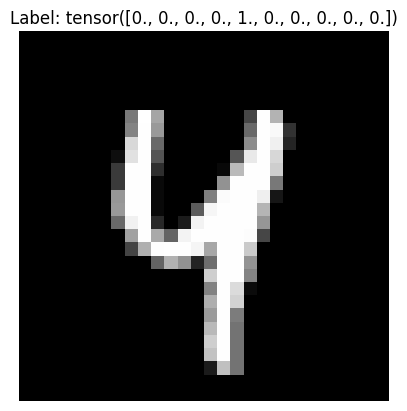

In [17]:
# Choose the index of the sample you want to visualize
sample_index = 42

# Get the image and label directly from the dataset (not the DataLoader)
image, label = mnist_loader_test.dataset[sample_index]

# Convert image tensor to numpy array for plotting
image_np = image.squeeze().numpy()  # shape (28, 28)

print(type(image))
print(image.shape)
print(image)

# Plot the image
plt.imshow(image_np, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()